# Codificação de arquivos e operações pontuais

## Convertendo imagem

Importando bibliotecas e definindo variávies.

In [30]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

file_name = "VisaoTrab1.tiff"
file_name_no_extension = os.path.splitext(file_name)[0]

4.0.1


Abrindo o arquivo "VisaoTrab1.tiff".

In [18]:
img = cv2.imread(file_name)

Criando arquivos JPEG - 10, 50 e 90%

In [19]:
created_files = []
for quality in [10, 50, 90]:
    created_files += [f'{file_name_no_extension}_{quality}.jpg']
    cv2.imwrite(created_files[-1], img, [int(cv2.IMWRITE_JPEG_QUALITY), quality])

Salvar imagem como TIFF - LZW.

In [20]:
created_files += [f'{file_name_no_extension}_LZW.tiff']
# cv2.imwrite(created_files[-1], img, [5])
# cv2.imwrite(created_files[-1], img, [int(cv2.TIFFTAG_COMPRESSION), 5])
cv2.imwrite(created_files[-1], img)

True

Agora analisando o tamanho dos arquivos:

In [21]:
file_size = os.path.getsize(file_name)
created_files_sizes = [os.path.getsize(x) for x in created_files]

print(f"Tamanho do arquivo original ({file_name}): {file_size} bytes.")
for i in range(len(created_files)):
    print(f"Tamanho do arquivo {created_files[i]}: {created_files_sizes[i]} bytes, {100.0 * created_files_sizes[i] / file_size:.2f}% do tamanho do arquivo original.")

Tamanho do arquivo original (VisaoTrab1.tiff): 786754 bytes.
Tamanho do arquivo VisaoTrab1_10.jpg: 6823 bytes, 0.87% do tamanho do arquivo original.
Tamanho do arquivo VisaoTrab1_50.jpg: 13226 bytes, 1.68% do tamanho do arquivo original.
Tamanho do arquivo VisaoTrab1_90.jpg: 35895 bytes, 4.56% do tamanho do arquivo original.
Tamanho do arquivo VisaoTrab1_LZW.tiff: 319636 bytes, 40.63% do tamanho do arquivo original.


------
## Correção gama

Convertento a imagem para HSV.

In [22]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

Valor gamma e constante com o valor máximo para o canal H.

In [23]:
gamma = 0.2
channel_max = 179.0

Separando o canal H na variável channel_h.

In [24]:
channel_h = np.zeros(hsv.shape[:2])
for x in range(hsv.shape[0]):
    for y in range(hsv.shape[1]):
        channel_h[x, y] = hsv[x, y][0] / channel_max

Aplicando operação gamma sobre todo o canal H.

In [25]:
channel_h = channel_h * gamma * channel_max

Salvando na matrix.

In [26]:
for x in range(hsv.shape[0]):
    for y in range(hsv.shape[1]):
        hsv[x, y][0] = int(max(min(channel_h[x, y], channel_max), 0))

Convertendo imagem para BGR e salvando o arquivo.

In [27]:
img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
file_name_gamma = f'{file_name_no_extension}_{gamma}.tiff'
cv2.imwrite(file_name_gamma, img)


True

Fazendo o histograma.

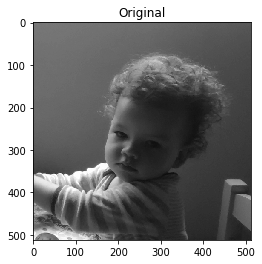

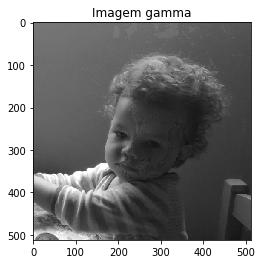

In [28]:
mpl.rc("savefig", dpi = 150)

image_titles = [(file_name, 'Original'), (file_name_gamma, 'Imagem gamma')]
images_rows_cols = []

for image_file_name, title in image_titles:
    img = cv2.imread(image_file_name, 0)
    rows, cols = img.shape
    images_rows_cols += [(img, rows, cols)]
    plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    plt.title(title)
    plt.show()

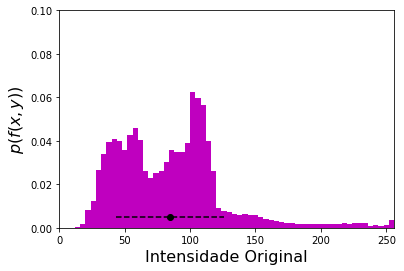


Media:  84.36088562011719
Desvio Padrao:  41.201500362409455


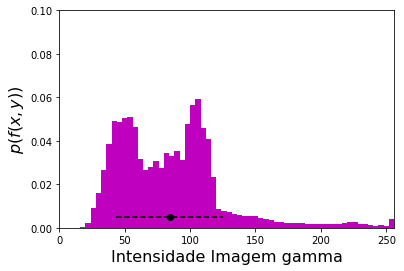


Media:  84.24576187133789
Desvio Padrao:  40.5345621297263


In [29]:
for i in range(len(image_titles)):
    img, rows, cols = images_rows_cols[i]
    image_file_name, title = image_titles[i]

    hist, bins = np.histogram(img, range=(0, 256), bins=64)
    hist = hist / float(rows * cols)
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', color='m', width=4)
    plt.xlim([0, 256])
    plt.ylim([0, 0.1])
    plt.ylabel('$p(f(x,y))$', fontsize=16)
    plt.xlabel(f'Intensidade {title}', fontsize=16)
    m_y = 0.005
    m = np.mean(img)
    s = np.std(img)
    plt.plot(m, m_y , "ko")
    plt.plot([m - s, m + s], [m_y] * 2, "k--");
    plt.savefig(f'{os.path.splitext(image_file_name)[0]}_Hist.eps')
    plt.show()
    print('\nMedia: ', np.mean(img))
    print('Desvio Padrao: ', np.std(img))